# **Project Title : Avocado average price and region Prediction**

**Project Type- Supervised Learning(Regression and Classification)**

**Contribution- Individual**

**Name- Vikash Kumar Diwakar**


# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

1. Gathering Data
    - CSV and others files
    - APIs
    - Web Scraping
    - Databases
2. Assessing Data
3. Cleaning Data
* **EDA and Features Engineering on features**

* **Features Transformation and selection**

* **Remove Multicollinearity**

* **model implementation and pre-processing**

1. Train, Test and Split
2. preprocessing using column-transformer

* **Fitting the regression models and HyperParameter Tuning**

* **Final selection of the model**

* **Conclusion**

# **Problem Statement**


Avocado is a fruit consumed by people heavily in the United States.

**Content**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled
into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and
price. Retail scan data comes directly from retailers’ cash registers based on actual retail
sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multioutlet reporting includes an aggregation of the following channels: grocery, mass, club, drug,
dollar and military. The Average Price (of avocados) in the table reflects a per unit (per
avocado) cost, even when multiple units (avocados) are sold in bags.
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of
avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
• `Date` - The date of the observation

• `AveragePrice` - the average price of a single avocado

• `type` - conventional or organic

• `year` - the year

• `Region` - the city or region of the observation

• `Total Volume `- Total number of avocados sold

• `4046` - Total number of avocados with PLU 4046 sold

• `4225` - Total number of avocados with PLU 4225 sold

• `4770` - Total number of avocados with PLU 4770 sold



In [93]:
import pandas as pd
import numpy as np

In [94]:
df=pd.read_csv('/content/avocado.csv')

# viewing first 5 rows
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [95]:
# checking number of rows and columns
df.shape

(18249, 14)

In [96]:
# checking info of each colums with their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [97]:
# checking null values across each column
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [98]:
# checking duplicate values
df.duplicated().sum()

0

# **Data Wrangling**

In [99]:
# droping unnecessary column
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [100]:
df.sample(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3554,2016-08-21,1.63,132894.77,2041.86,66472.24,18506.96,45873.71,39617.39,1742.09,4514.23,conventional,2016,GrandRapids


In [101]:
# dropping date column as well
df.drop(columns=['Date'],axis=1,inplace=True)

In [102]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2985,0.78,69620.36,30747.49,1920.5,2.53,36949.84,36949.84,0.0,0.0,conventional,2016,Boise


# **`AveragePrice`**

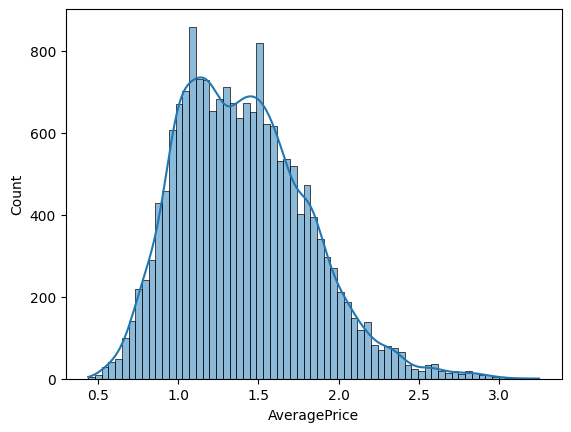

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting AveragePrice column
sns.histplot(df['AveragePrice'],kde=True);

# **`Total Volume`**

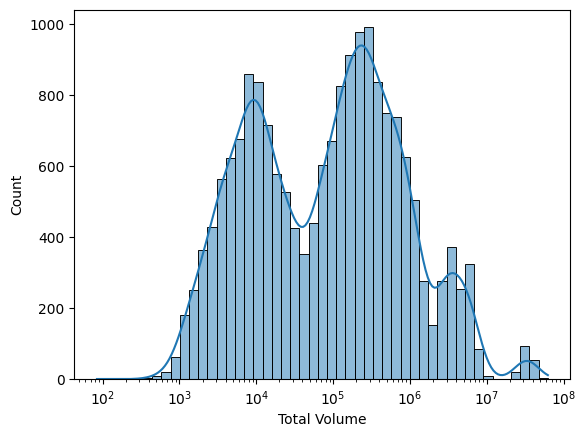

In [104]:
sns.histplot(df['Total Volume'],kde=True,log_scale=True);

In [105]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3489,1.35,243576.96,76104.87,46523.68,5327.53,115620.88,114230.31,1381.66,8.91,conventional,2016,Detroit


# **`4046`**

<Axes: xlabel='4046', ylabel='Count'>

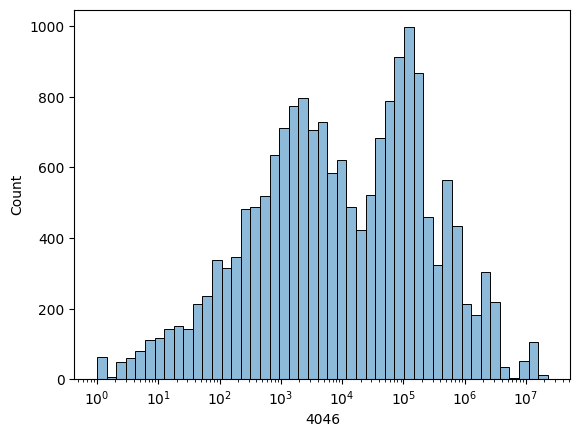

In [106]:
sns.histplot(df['4046'],kde=True,log_scale=True)

In [107]:
df['4046'].value_counts()

4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64

In [108]:
df[df['4046']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9130,1.94,831.69,0.0,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany
9323,1.63,1777.09,0.0,1209.68,0.0,567.41,366.67,200.74,0.0,organic,2015,Boise
9329,1.43,1780.76,0.0,999.31,0.0,781.45,283.33,498.12,0.0,organic,2015,Boise
9332,1.44,2378.68,0.0,1923.40,0.0,455.28,170.00,285.28,0.0,organic,2015,Boise
9386,1.47,5043.15,0.0,166.37,0.0,4876.78,2751.87,2124.91,0.0,organic,2015,BuffaloRochester
...,...,...,...,...,...,...,...,...,...,...,...,...
17887,1.54,3737.85,0.0,1199.91,0.0,2537.94,1769.94,768.00,0.0,organic,2018,Louisville
17966,1.58,29699.89,0.0,195.20,0.0,29504.69,29504.69,0.00,0.0,organic,2018,NorthernNewEngland
17967,1.39,22495.69,0.0,176.23,0.0,22319.46,22319.46,0.00,0.0,organic,2018,NorthernNewEngland
17969,1.29,50288.63,0.0,383.92,0.0,49904.71,49904.71,0.00,0.0,organic,2018,NorthernNewEngland


In [109]:
mean_4046 = round(df[~df['4046'].isnull()]['4046'].mean(),2)
mean_4046

293008.42

In [110]:
df['4046'].replace(0,mean_4046,inplace=True)

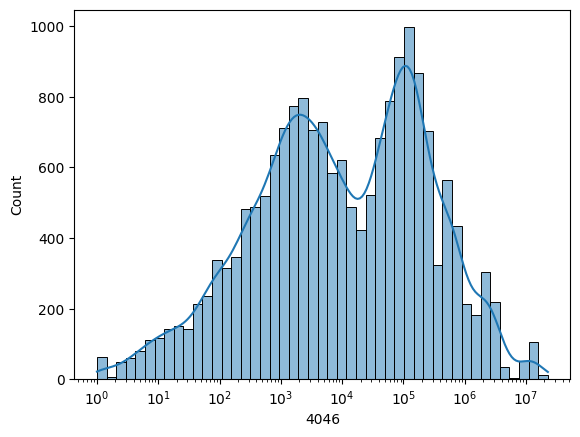

In [111]:
sns.histplot(df['4046'],kde=True,log_scale=True);

In [112]:
df[df['4046']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


# **`4225`**

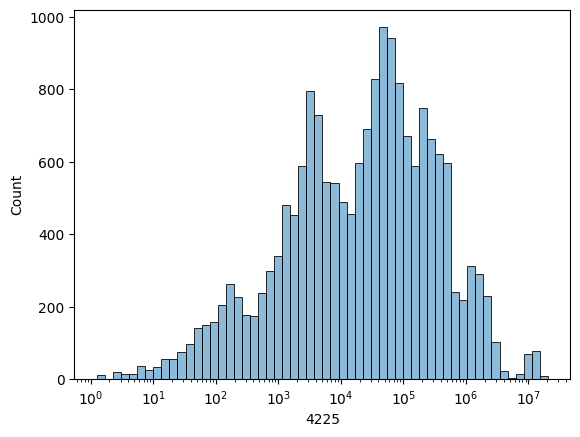

In [113]:
sns.histplot(df['4225'],kde=True,log_scale=True);

In [114]:
df[df['4225']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10420,1.72,2118.66,945.33,0.0,0.0,1173.33,1173.33,0.00,0.0,organic,2015,MiamiFtLauderdale
10531,1.66,1822.24,470.42,0.0,0.0,1351.82,1351.82,0.00,0.0,organic,2015,NewOrleansMobile
10532,1.60,1529.16,424.70,0.0,0.0,1104.46,1104.46,0.00,0.0,organic,2015,NewOrleansMobile
10533,1.35,2211.53,294.65,0.0,0.0,1916.88,1916.88,0.00,0.0,organic,2015,NewOrleansMobile
10534,1.58,2041.47,221.95,0.0,0.0,1819.52,1812.85,6.67,0.0,organic,2015,NewOrleansMobile
...,...,...,...,...,...,...,...,...,...,...,...,...
16218,1.33,6425.79,254.69,0.0,0.0,6171.10,5927.54,243.56,0.0,organic,2017,NewOrleansMobile
16220,1.30,2939.28,129.28,0.0,0.0,2810.00,1861.27,948.73,0.0,organic,2017,NewOrleansMobile
16223,1.26,5077.97,189.58,0.0,0.0,4888.39,3309.59,1578.80,0.0,organic,2017,NewOrleansMobile
16570,1.54,2406.34,165.75,0.0,0.0,2240.59,2226.75,13.84,0.0,organic,2017,Pittsburgh


In [115]:
mean_4225 = round(df[~df['4225'].isnull()]['4225'].mean(),2)
mean_4225

295154.57

In [116]:
df['4225'].replace(0,mean_4225,inplace=True)

In [117]:
df[df['4225']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


# **`4770`**

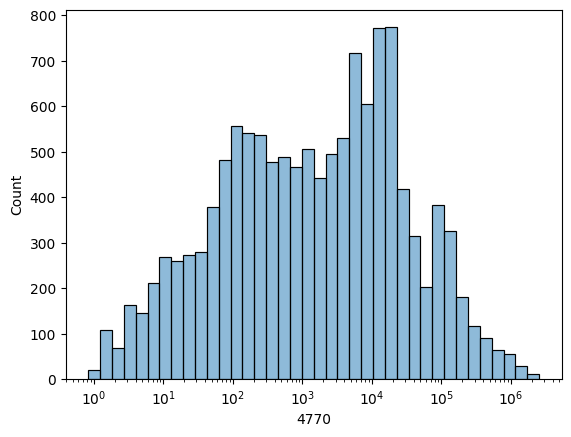

In [118]:
sns.histplot(df['4770'],kde=True,log_scale=True);

In [119]:
df[df['4770']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2998,0.63,82585.83,32240.97,3928.02,0.0,46416.84,46257.90,140.79,18.15,conventional,2016,Boise
9126,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.00,organic,2015,Albany
9127,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.00,organic,2015,Albany
9128,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.00,organic,2015,Albany
9129,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.00,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18241,1.57,18421.24,1974.26,2482.65,0.0,13964.33,13698.27,266.06,0.00,organic,2018,WestTexNewMexico
18242,1.56,17597.12,1892.05,1928.36,0.0,13776.71,13553.53,223.18,0.00,organic,2018,WestTexNewMexico
18243,1.57,15986.17,1924.28,1368.32,0.0,12693.57,12437.35,256.22,0.00,organic,2018,WestTexNewMexico
18244,1.63,17074.83,2046.96,1529.20,0.0,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico


In [120]:
mean_4770 = round(df[~df['4770'].isnull()]['4770'].mean(),2)
mean_4770

22839.74

In [121]:
df['4770'].replace(0,mean_4770,inplace=True)

In [122]:
df[df['4770']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [123]:
# dropping total bags column as its sum of other bags and it will crate multicollinearity
df.drop(columns=['Total Bags'],axis=1,inplace=True)

In [124]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
13937,1.16,9568.18,131.67,4168.66,395.0,1665.78,3207.07,0.0,organic,2016,RichmondNorfolk


# **`Small Bags`**

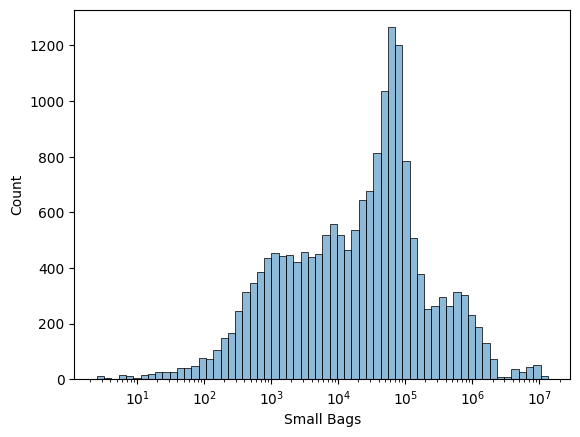

In [125]:
sns.histplot(df['Small Bags'],kde=True,log_scale=True);

In [126]:
df[df['Small Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
9189,1.75,7279.83,2387.77,3377.79,22839.74,0.0,1514.27,0.0,organic,2015,Atlanta
9190,1.79,7423.50,2743.66,3550.81,22839.74,0.0,1129.03,0.0,organic,2015,Atlanta
9191,2.01,5392.63,2232.51,3021.00,22839.74,0.0,139.12,0.0,organic,2015,Atlanta
9192,2.04,5705.15,2378.64,3304.23,22839.74,0.0,22.28,0.0,organic,2015,Atlanta
9203,1.50,5744.26,1577.43,2748.05,22839.74,0.0,1418.78,0.0,organic,2015,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...
14428,1.69,2401.84,75.14,1380.50,22839.74,0.0,946.20,0.0,organic,2016,Spokane
14463,1.30,5153.05,1408.40,528.99,22839.74,0.0,3215.66,0.0,organic,2016,StLouis
14465,1.21,4042.51,1101.45,422.83,22839.74,0.0,2518.23,0.0,organic,2016,StLouis
14844,1.62,6291.29,1129.49,3582.50,22839.74,0.0,1579.30,0.0,organic,2017,Atlanta


In [127]:
mean_Small_Bags = round(df[~df['Small Bags'].isnull()]['Small Bags'].mean(),2)
mean_Small_Bags

182194.69

In [128]:
df['Small Bags'].replace(0,mean_Small_Bags,inplace=True)

In [129]:
df[df['Small Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region


# **`	Large Bags`**

In [130]:
df[df['Large Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
159,0.71,95295.34,35590.98,12526.50,4086.26,42734.53,0.0,357.07,conventional,2015,Boise
160,1.06,49069.13,24189.98,2789.67,6031.49,15860.63,0.0,197.36,conventional,2015,Boise
164,1.14,53585.51,30434.99,4359.52,6428.27,12331.82,0.0,30.91,conventional,2015,Boise
165,1.11,59874.45,29521.58,10089.82,6551.57,13660.98,0.0,50.50,conventional,2015,Boise
166,1.16,54191.14,29614.23,9069.38,6586.27,8918.00,0.0,3.26,conventional,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...
18113,2.27,20325.75,9368.06,8808.80,22839.74,2148.89,0.0,0.00,organic,2018,SanFrancisco
18114,1.36,27919.45,13037.67,11998.44,22839.74,2883.34,0.0,0.00,organic,2018,SanFrancisco
18115,1.32,37347.89,19301.15,14957.23,22839.74,3089.51,0.0,0.00,organic,2018,SanFrancisco
18116,2.30,20151.24,10165.34,8042.56,22839.74,1943.34,0.0,0.00,organic,2018,SanFrancisco


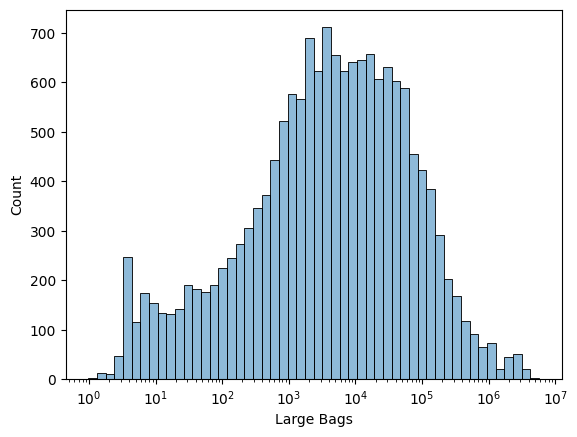

In [131]:
sns.histplot(df['Large Bags'],kde=True,log_scale=True);

In [132]:
mean_large_bags = round(df[~df['Large Bags'].isnull()]['Large Bags'].mean(),2)
mean_large_bags

54338.09

In [133]:
df['Large Bags'].replace(0,mean_large_bags,inplace=True)

In [134]:
df[df['Large Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region


# **`XLarge Bags`**

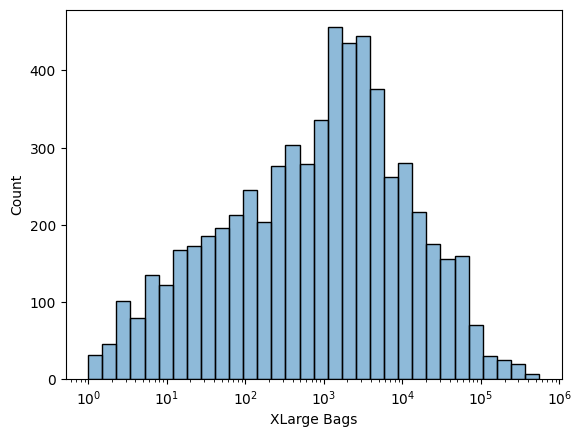

In [135]:
sns.histplot(df['XLarge Bags'],kde=True,log_scale=True);

In [136]:
df[df['XLarge Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,22839.74,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,22839.74,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [137]:
mean_XL = round(df[~df['XLarge Bags'].isnull()]['XLarge Bags'].mean(),2)
mean_XL

3106.43

In [138]:
df['XLarge Bags'].replace(0,mean_XL,inplace=True)

# **`type`**

<Axes: xlabel='type', ylabel='count'>

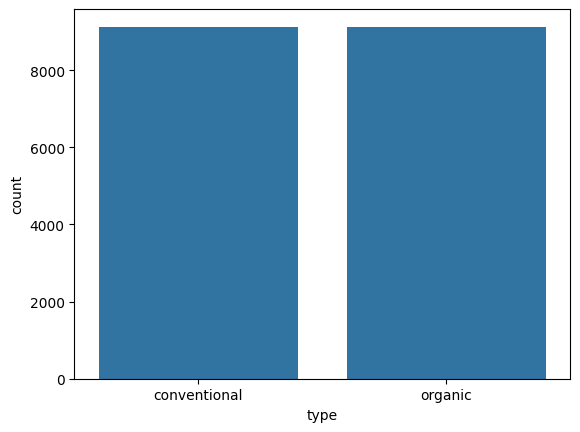

In [139]:
sns.countplot(x='type',data=df)

# **`year`**

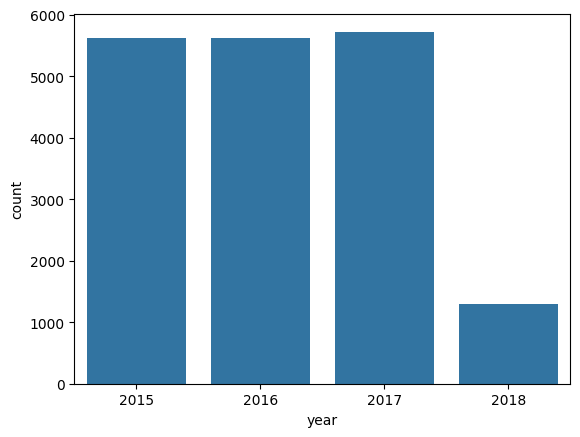

In [140]:
sns.countplot(x='year',data=df);

# **EDA**

In [141]:
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
12827,2.33,5131.43,35.26,3657.66,12.47,1237.39,188.65,3106.43,organic,2016,HartfordSpringfield


<Axes: xlabel='type', ylabel='AveragePrice'>

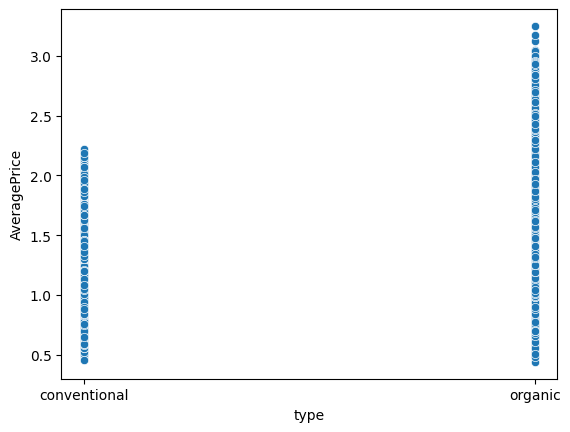

In [142]:
sns.scatterplot(y='AveragePrice',x='type',data=df)

In [143]:
# creating a copy of original dataframe
df_copy = df.copy()

In [144]:
df_copy.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.43,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.43,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,3106.43,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,3106.43,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,3106.43,conventional,2015,Albany


# **Regression :**

In [145]:
encoded_df = pd.get_dummies(df_copy,columns=['type','year','region'],drop_first=True,sparse=False,dtype=int)

In [146]:
encoded_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_organic,year_2016,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.43,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.43,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,3106.43,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,3106.43,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,3106.43,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
encoded_df.corr().iloc[:,:8]

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192752,-0.206687,-0.172693,-0.146752,-0.173151,-0.154010,-0.084869
Total Volume,-0.192752,1.000000,0.977463,0.974078,0.864455,0.966977,0.877119,0.736038
4046,-0.206687,0.977463,1.000000,0.925593,0.826171,0.924627,0.835021,0.688072
4225,-0.172693,0.974078,0.925593,1.000000,0.880332,0.915659,0.806358,0.677366
4770,-0.146752,0.864455,0.826171,0.880332,1.000000,0.794642,0.689588,0.667364
...,...,...,...,...,...,...,...,...
region_Syracuse,0.039010,-0.032549,-0.024142,-0.031632,-0.023496,-0.031858,-0.022678,-0.018128
region_Tampa,0.000978,-0.026069,-0.020764,-0.029274,-0.023454,-0.028065,-0.013960,-0.015931
region_TotalUS,-0.029665,0.656367,0.628229,0.646424,0.557634,0.643691,0.589956,0.470544
region_West,-0.045633,0.094063,0.095858,0.067738,0.039346,0.087496,0.205295,-0.011261


In [148]:
X = encoded_df.drop(columns=['AveragePrice'])
y = encoded_df['AveragePrice']

In [149]:
X

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_organic,year_2016,year_2017,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,3106.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,3106.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,3106.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,22839.74,13066.82,431.85,3106.43,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,13888.04,1191.70,3431.50,22839.74,8940.04,324.80,3106.43,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,3106.43,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,3106.43,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [151]:
# importing libraries and train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [152]:
X_train.shape

(14599, 64)

In [153]:
X.shape

(18249, 64)

In [154]:
X

array([[-0.22771641, -0.23397205, -0.2007418 , ..., -0.13737207,
        -0.13737207, -0.13674962],
       [-0.23042664, -0.23425869, -0.20889489, ..., -0.13737207,
        -0.13737207, -0.13674962],
       [-0.21208462, -0.23416346, -0.15531293, ..., -0.13737207,
        -0.13737207, -0.13674962],
       ...,
       [-0.24233073, -0.23384933, -0.2439341 , ..., -0.13737207,
        -0.13737207,  7.31263474],
       [-0.24162464, -0.23358384, -0.24349534, ..., -0.13737207,
        -0.13737207,  7.31263474],
       [-0.24125273, -0.23250267, -0.24401438, ..., -0.13737207,
        -0.13737207,  7.31263474]])

In [155]:
X_test.shape

(3650, 64)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

# apply LinearRegression algorithm as step2

step1 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1', LinearRegression())])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5842575023580996
Adjusted R2 score 0.5824267936853955


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5793534745335157
Adjusted R2 score 0.5718440247064991


The performance metrics
-----------------------------------------
MAE 0.19351598943899803
MSE 0.06758489164747372
RMSE 0.2599709438523346


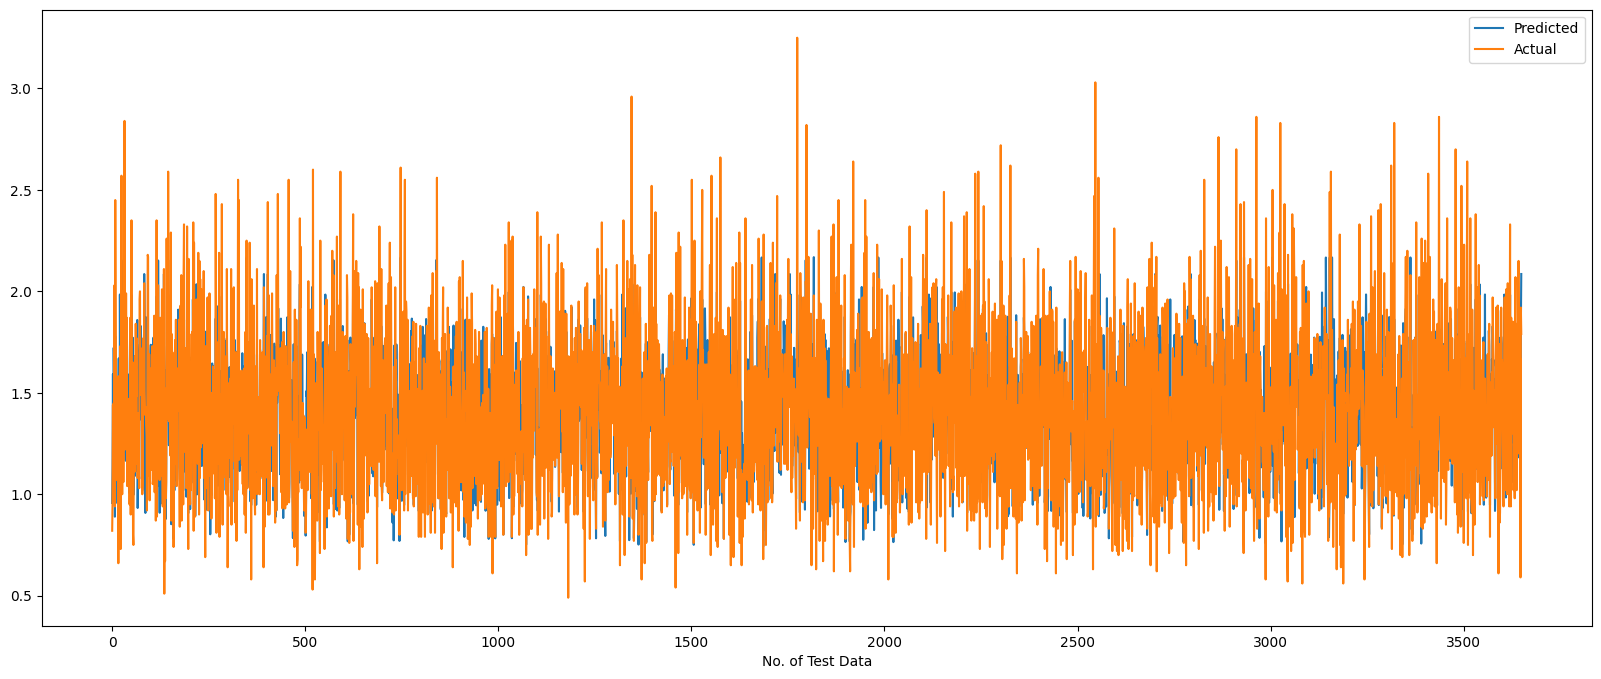

In [157]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

In [158]:
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step1 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5842382938216955
Adjusted R2 score 0.5824075005648212


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5793957409132748
Adjusted R2 score 0.5718870456325077


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 12}
cross-validation score 0.5801617811145318


The performance metrics
-----------------------------------------
MAE 0.19353239820796558
MSE 0.06757810074698266
RMSE 0.2599578826405975


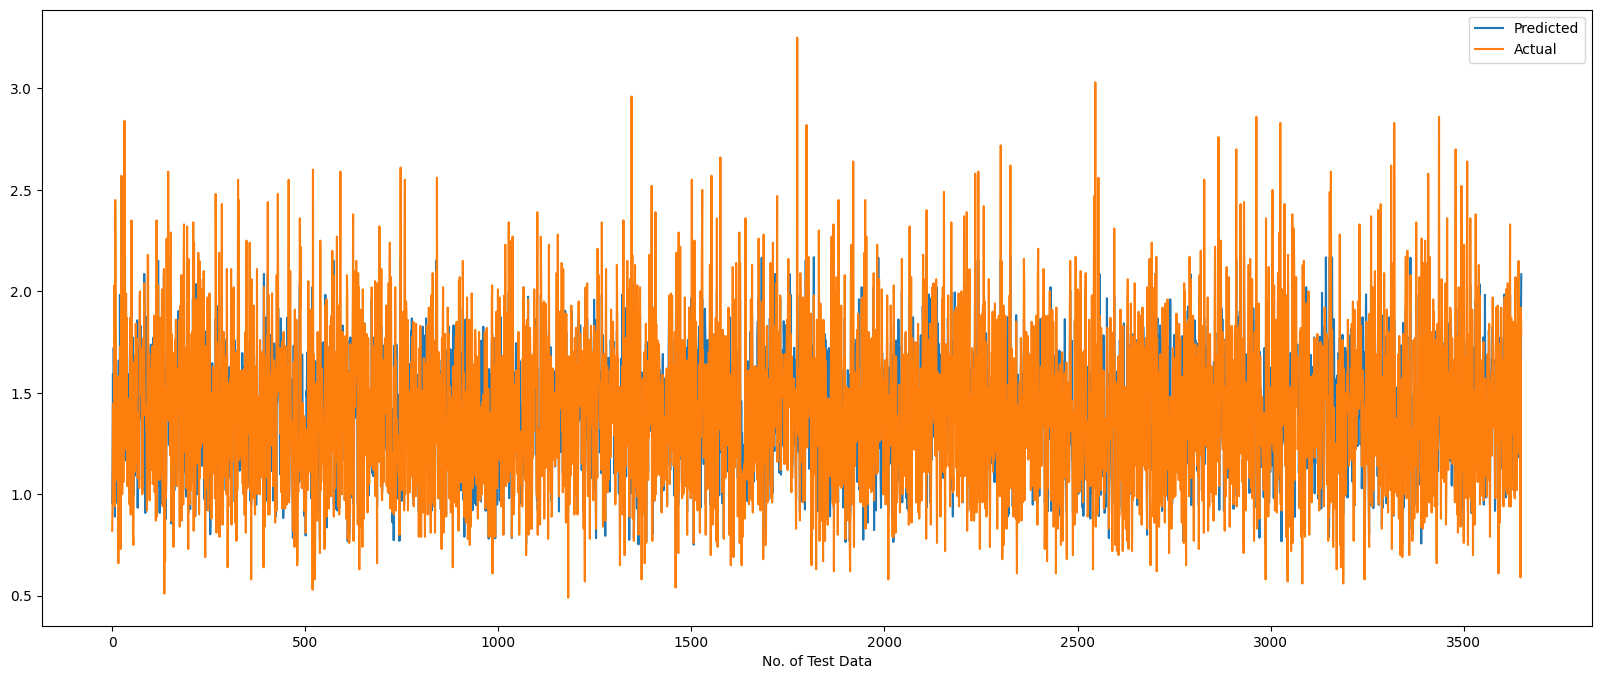

In [159]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

In [160]:
# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.linear_model import Lasso

Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step1 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.430e+02, tolerance: 2.134e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.439e+02, tolerance: 2.135e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.436e+02, tolerance: 2.134e

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5842450555121468
Adjusted R2 score 0.5824142920301582


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5793996507824045
Adjusted R2 score 0.5718910253012537


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 1e-05}
cross-validation score 0.5801648990060073


The performance metrics
-----------------------------------------
MAE 0.19352105736802447
MSE 0.06757747255189371
RMSE 0.2599566743745844


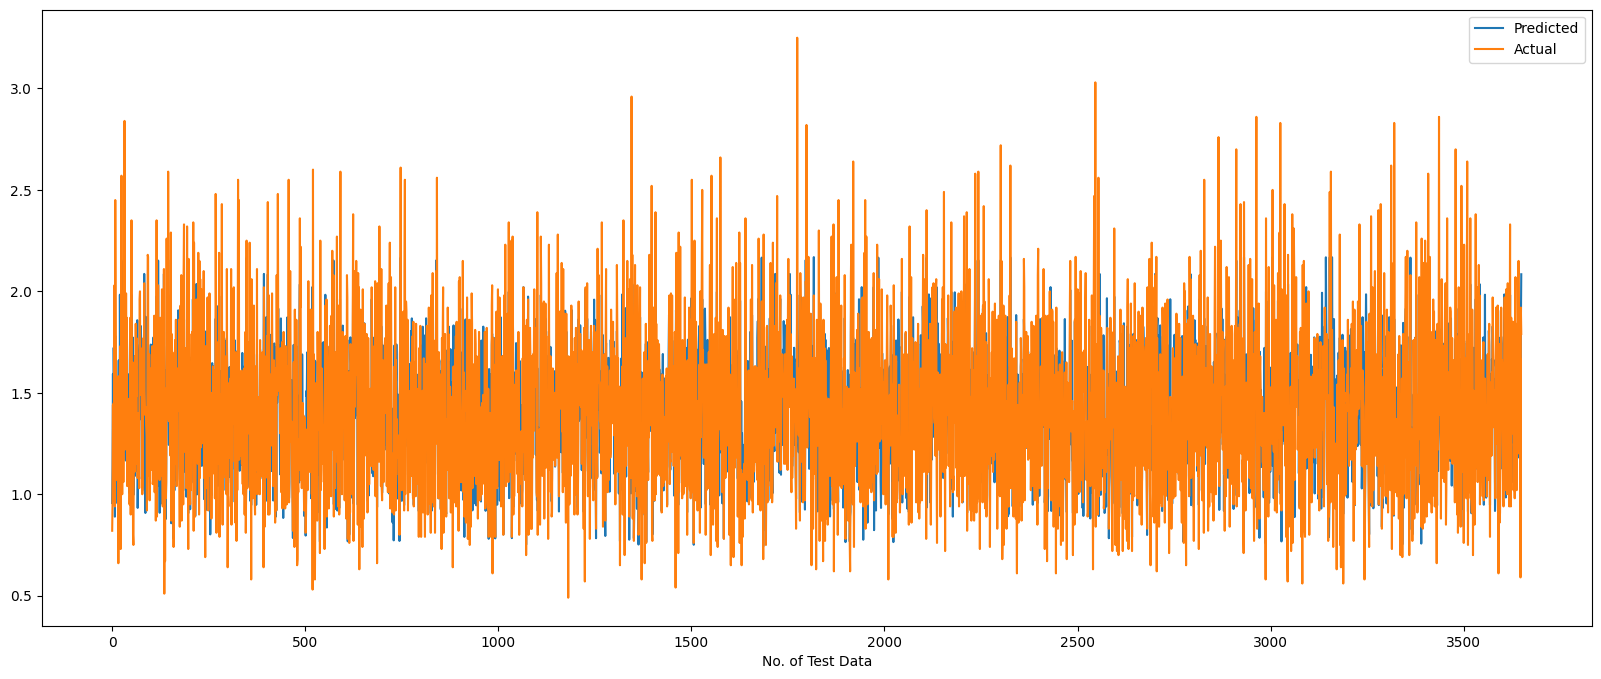

In [161]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

In [162]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step1 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5694304050784134
Adjusted R2 score 0.5675344057612961


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5444479715679691
Adjusted R2 score 0.5363153830548171


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.5588955898581472


The performance metrics
-----------------------------------------
MAE 0.201324782720512
MSE 0.07319312681169121
RMSE 0.27054228285369963


In [163]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[90],          #[50,55,60,70,80,90,100],
    'max_depth' : [None],         #[4,5,6,7,8,9,None],
    'max_features' : ['log2'],    #['sqrt','log2'],
    'max_samples' :[1.0]          #[ 0.40,0.50,0.60,0.70,0.75,0.85,1.0]
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step1 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [None],
                                          'max_features': ['log2'],
                                          'max_samples': [1.0],
                                          'n_estimators': [90]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9804230319331879
Adjusted R2 score 0.9803368253860381


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8613951028981165
Adjusted R2 score 0.8589207058508305


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': None, 'max_features': 'log2', 'max_samples': 1.0, 'n_estimators': 90}
cross-validation score 0.8550584334694238


The performance metrics
-----------------------------------------
MAE 0.10714045727332028
MSE 0.022269521760703143
RMSE 0.1492297616452668


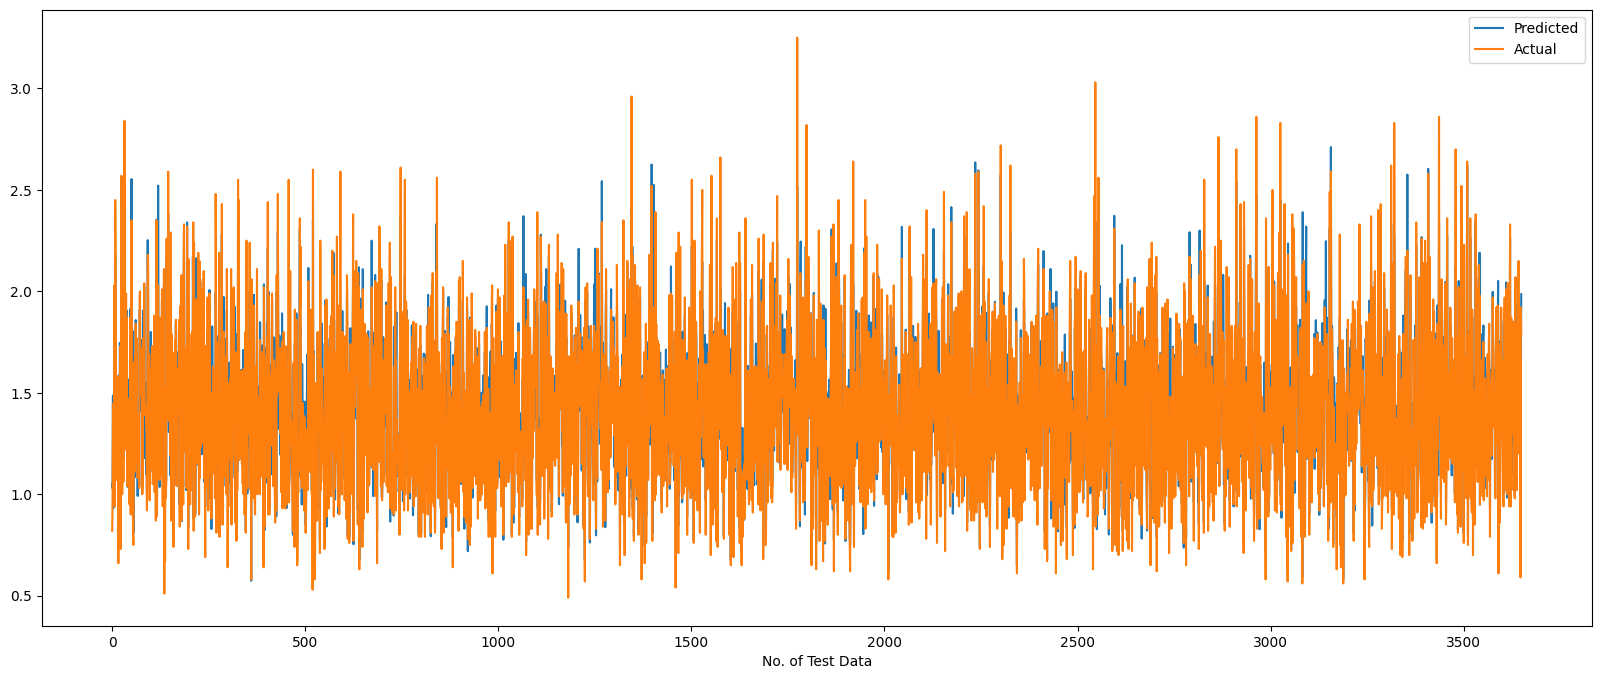

In [164]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

In [165]:
# apply AdaBoostRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[120] ,       #[50,80,120,160,180,200,220,240],
    'learning_rate' : [0.1],    #[ 0.0001,0.001,0.01,0.1,1]
    'loss' :['exponential']     #['linear', 'square', 'exponential'],
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

abr = GridSearchCV(AdaBoostRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step1 = abr

# make pipeline
pipe6 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# display pipeline diagram
display(pipe6)

# AdaBoostRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", abr.best_params_)
print('cross-validation score', abr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                              param_grid={'learning_rate': [0.1],
                                          'loss': ['exponential'],
                                          'n_estimators': [120]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.5132312368882638
Adjusted R2 score 0.5110877663475213


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.4880075201157197
Adjusted R2 score 0.47886734753201154


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 120}
cross-validation score 0.5047853037336069


The performance metrics
-----------------------------------------
MAE 0.22566634852062353
MSE 0.08226136240856102
RMSE 0.2868124167614802


# **`XGBRegressor with hyperparameter tuning`**

In [166]:
# apply XGBRegressor algorithm with hyperparameter tuning as step2
from xgboost import XGBRegressor

# giving parameters
parameters = {
    'n_estimators' :[200],                                                    # 150,160,170,180,200
    'learning_rate' :[0.1],                                                  # 0.001,0.005,0.01,0.05,0.1
    'max_depth' :[8]                                                          # 3,4,5,6,7,8
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
xgbr = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid=parameters , cv=10, n_jobs=-1)

step1 = xgbr

# make pipeline
pipe7 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe7.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe7.predict(X_train)
y_pred = pipe7.predict(X_test)

# display pipeline diagram
display(pipe7)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", xgbr.best_params_)
print('cross-validation score', xgbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constraints...
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.1],
                                          'max_depth': [8],
                                          'n_estimators': [200]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9410242858246687
Adjusted R2 score 0.9407645881703945


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8529857373846352
Adjusted R2 score 0.8503612149836914


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
cross-validation score 0.8500595010401891


The performance metrics
-----------------------------------------
MAE 0.11194976944270199
MSE 0.023620646809037627
RMSE 0.15369009990574417


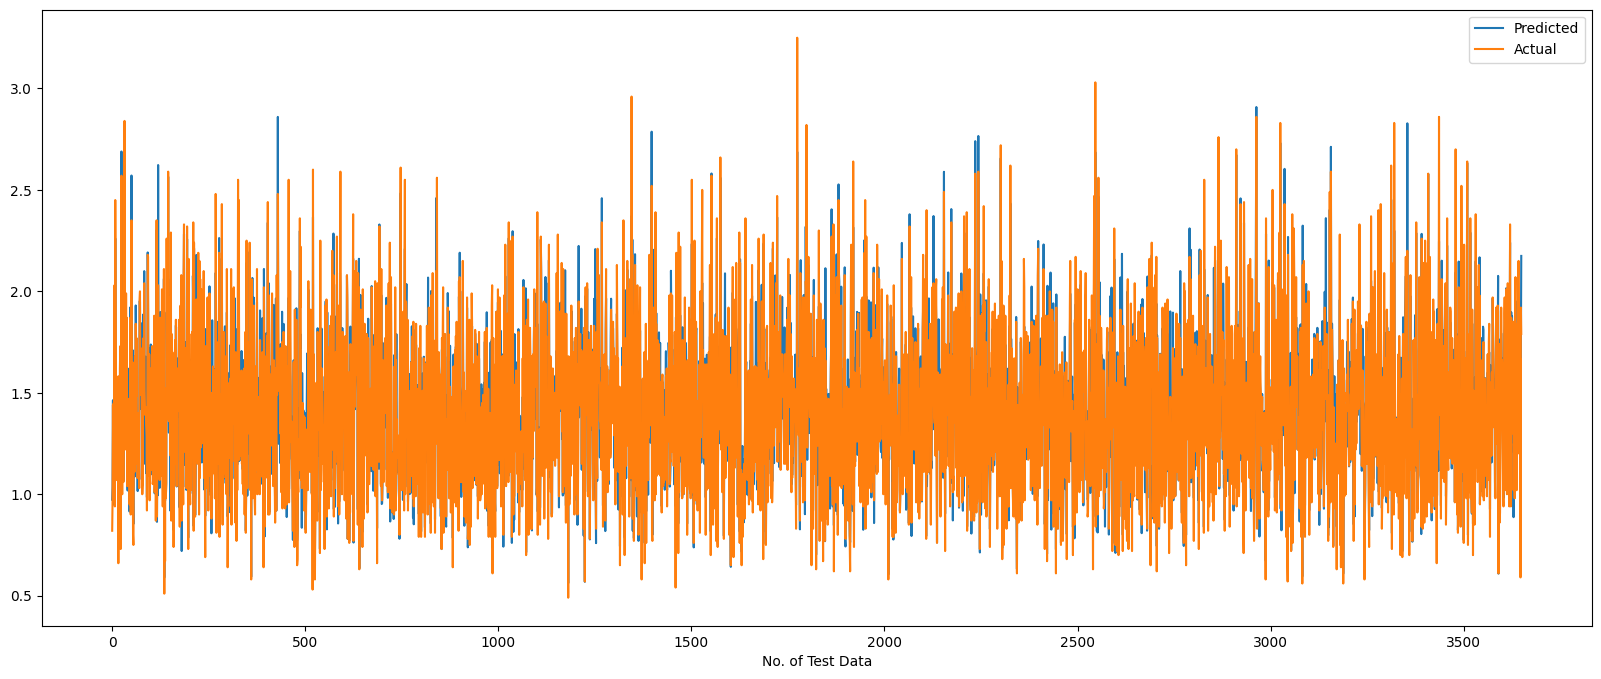

In [167]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **Classification :**

In [168]:
df_copy.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.43,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.43,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,3106.43,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,3106.43,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,3106.43,conventional,2015,Albany


In [169]:
# viewing target column
df_copy['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

* we can conclude that its a balanced dataset.

In [170]:
# checking number of catagories
print(f"There Are {len(df_copy['region'].unique())} different catagories in target column")

There Are 54 different catagories in target column


# **Data Transformation**

In [171]:
df_copy['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [172]:
new_df=df_copy.copy()
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.43,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.43,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,3106.43,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,3106.43,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,3106.43,conventional,2015,Albany


In [173]:
# label encoding type and region column
from sklearn.preprocessing import LabelEncoder

new_df=pd.get_dummies(new_df,columns=['type','year'],drop_first=True,sparse=True,dtype=int)
# new_df['region_new'] = LabelEncoder.fit_transform(new_df['region'])

In [174]:
new_df.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,region,type_organic,year_2016,year_2017,year_2018
5288,0.82,131734.46,23285.87,29662.45,3466.99,75098.77,69.31,151.07,Spokane,0,1,0,0
15542,1.53,133203.19,3394.42,39866.70,22839.74,82838.51,6633.64,3106.43,GreatLakes,1,0,1,0
13734,1.31,2124.35,238.56,388.88,35.95,1460.96,54338.09,3106.43,Pittsburgh,1,1,0,0
14393,1.93,2088.07,645.19,996.54,22839.74,22.53,423.81,3106.43,Spokane,1,1,0,0
13179,1.68,1460.66,44.55,1039.39,22839.74,182194.69,376.72,3106.43,Louisville,1,1,0,0


In [175]:
X = new_df.drop(columns=['region'])
y = new_df['region']

In [176]:
X

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_organic,year_2016,year_2017,year_2018
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.43,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.43,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,3106.43,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,3106.43,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,3106.43,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,22839.74,13066.82,431.85,3106.43,1,0,0,1
18245,1.71,13888.04,1191.70,3431.50,22839.74,8940.04,324.80,3106.43,1,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,3106.43,1,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,3106.43,1,0,0,1


In [177]:
X.corr()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_organic,year_2016,year_2017,year_2018
AveragePrice,1.000000,-0.192752,-0.206687,-0.172693,-0.146752,-0.173151,-0.154010,-0.084869,0.615845,-0.111502,0.183200,-0.040133
Total Volume,-0.192752,1.000000,0.977463,0.974078,0.864455,0.966977,0.877119,0.736038,-0.232434,0.001501,0.002289,0.017316
4046,-0.206687,0.977463,1.000000,0.925593,0.826171,0.924627,0.835021,0.688072,-0.222827,-0.010548,-0.002071,0.013172
4225,-0.172693,0.974078,0.925593,1.000000,0.880332,0.915659,0.806358,0.677366,-0.231493,0.001674,-0.014202,0.004246
4770,-0.146752,0.864455,0.826171,0.880332,1.000000,0.794642,0.689588,0.667364,-0.147329,0.032726,-0.043839,-0.011635
Small Bags,-0.173151,0.966977,0.924627,0.915659,0.794642,1.000000,0.898993,0.796916,-0.218465,0.012881,0.027189,0.035051
Large Bags,-0.154010,0.877119,0.835021,0.806358,0.689588,0.898993,1.000000,0.702041,-0.173936,0.011165,0.034538,0.042353
XLarge Bags,-0.084869,0.736038,0.688072,0.677366,0.667364,0.796916,0.702041,1.000000,-0.120678,0.016476,0.034967,0.032451
type_organic,0.615845,-0.232434,-0.222827,-0.231493,-0.147329,-0.218465,-0.173936,-0.120678,1.000000,0.000110,-0.000125,0.000045
year_2016,-0.111502,0.001501,-0.010548,0.001674,0.032726,0.012881,0.011165,0.016476,0.000110,1.000000,-0.450620,-0.184348


<Axes: >

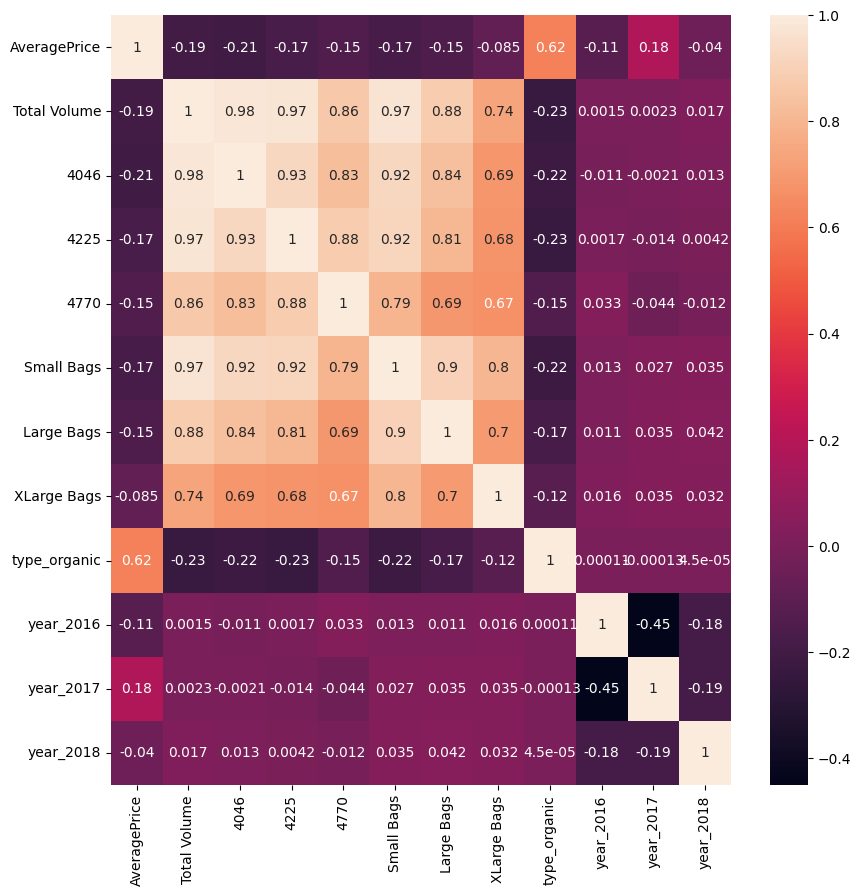

In [178]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,linecolor='white')

In [179]:
y

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [180]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [181]:

#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [184]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [185]:
# Display the results
print("y_train before encoding:", y_train.values)
print("y_train after encoding:", y_train_encoded)
print("y_test before encoding:", y_test.values)
print("y_test after encoding:", y_test_encoded)
print("Classes:", label_encoder.classes_)

y_train before encoding: ['Orlando' 'SanDiego' 'PhoenixTucson' ... 'Syracuse' 'HarrisburgScranton'
 'Indianapolis']
y_train after encoding: [31 41 33 ... 49 16 19]
y_test before encoding: ['Columbus' 'Tampa' 'Tampa' ... 'PhoenixTucson' 'NorthernNewEngland'
 'NewYork']
y_test after encoding: [10 50 50 ... 33 30 28]
Classes: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'S

In [186]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [187]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [189]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train_encoded), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test_encoded), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test_encoded,average='weighted'), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test_encoded,average='weighted'), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test_encoded,average='weighted'), 3)
# roc_score_logi = round(roc_auc_score(y_pred_logi,y_test_encoded,multi_class='ovr'), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
# print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.305
The accuracy on test data is  0.291
The precision on test data is  0.379
The recall on test data is  0.291
The f1 on test data is  0.304


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **`Decision Tree Classifier`**

In [190]:
# importing decisiontree
from sklearn.tree import DecisionTreeClassifier

In [191]:
# creating object anf fitting the model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train_encoded)

DecisionTreeClassifier()

In [192]:
# class predicting y
y_pred_dtc=dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [193]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train_encoded), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test_encoded), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test_encoded,average='weighted'), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test_encoded,average='weighted'), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test_encoded,average='weighted'), 3)
# roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test_encoded,average='weighted'), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
# print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.792
The precision on test data is  0.794
The recall on test data is  0.792
The f1 on test data is  0.792


# **`Random Forest Classifier`**

In [194]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [195]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train_encoded)

RandomForestClassifier(n_estimators=50)

In [196]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [197]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train_encoded), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test_encoded), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test_encoded,average='weighted'), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test_encoded,average='weighted'), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test_encoded,average='weighted'), 3)
# roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
# print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.891
The precision on test data is  0.894
The recall on test data is  0.891
The f1 on test data is  0.892


# **`Gradient Boosting`**

In [198]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [200]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train_encoded)

GradientBoostingClassifier(random_state=42)

In [201]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [202]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train_encoded), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test_encoded), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test_encoded,average='weighted'), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test_encoded,average='weighted'), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test_encoded,average='weighted'), 3)
# roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
# print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.974
The accuracy on test data is  0.818
The precision on test data is  0.823
The recall on test data is  0.818
The f1 on test data is  0.819


# **`XG Boosting`**

In [203]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [204]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [205]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [206]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train_encoded), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test_encoded), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test_encoded,average='weighted'), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test_encoded,average='weighted'), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test_encoded,average='weighted'), 3)
# roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
# print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  0.88
The precision on test data is  0.882
The recall on test data is  0.88
The f1 on test data is  0.88


# **`BaseLine Model Comparison`**

In [207]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc,recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_gbc, f1_score_xgb]
# all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc,roc_score_gbc, roc_score_xgb]

In [209]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score })


In [210]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.305,0.291,0.379,0.291,0.304
1,Decision Tree,1.000,0.792,0.794,0.792,0.792
2,Random Forest,1.000,0.891,0.894,0.891,0.892
3,Gradient Boosting,0.974,0.818,0.823,0.818,0.819
4,XG Boosting,1.000,0.880,0.882,0.880,0.880


In [211]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
2,Random Forest,1.000,0.891,0.894,0.891,0.892
4,XG Boosting,1.000,0.880,0.882,0.880,0.880
3,Gradient Boosting,0.974,0.818,0.823,0.818,0.819
1,Decision Tree,1.000,0.792,0.794,0.792,0.792
0,Logistic Regression,0.305,0.291,0.379,0.291,0.304


In [214]:
features = list(i for i in list(df_copy.describe(include='all').columns) if i != 'region')
features

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year']

In [217]:
feature_importances_rfc = rfc.feature_importances_
feature_importances_rfc

array([0.08764367, 0.13240673, 0.18509236, 0.17308815, 0.11366787,
       0.11871143, 0.10704277, 0.02800126, 0.0196157 , 0.01306704,
       0.01532006, 0.00634296])

In [218]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc[:10], index=features)

In [219]:
feature_importances_rfc_df.sort_values(ascending=False)


4046            0.185092
4225            0.173088
Total Volume    0.132407
Small Bags      0.118711
4770            0.113668
Large Bags      0.107043
AveragePrice    0.087644
XLarge Bags     0.028001
type            0.019616
year            0.013067
dtype: float64

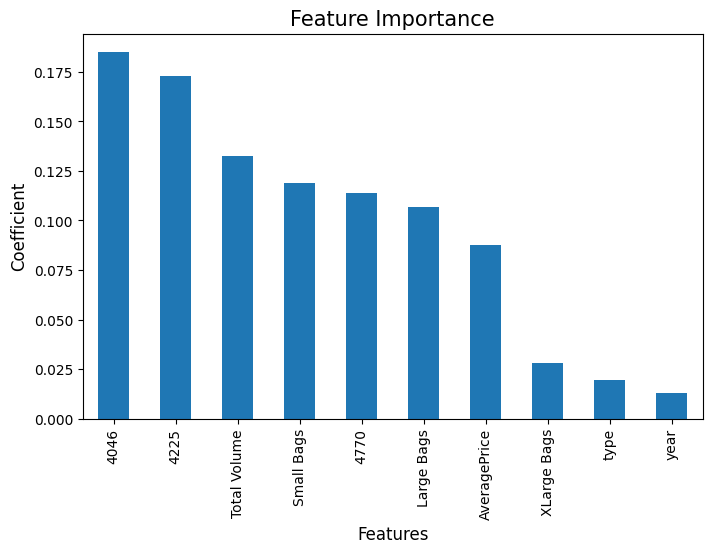

In [222]:
fig = plt.figure(figsize=(8,5))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

`4046` is the most important feature.

# **Cross Validation and Hyperparameter Tuning**

# **`Decision Trees`**

In [225]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [226]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1)
# fitting model
dtc_grid.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             verbose=3)

In [227]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=40,
                       min_samples_split=0.001)

In [228]:
dtc_grid.best_params_

{'max_depth': 30, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [229]:
dtc_optimal_model = dtc_grid.best_estimator_

In [230]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

In [231]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train_encoded), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test_encoded), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test_encoded,average='weighted'), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test_encoded,average='weighted'), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test_encoded,average='weighted'), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)

The accuracy on train data is  0.692
The accuracy on test data is  0.644
The precision on test data is  0.667
The recall on test data is  0.644
The f1 on test data is  0.648


# **`Random Forest`**

In [232]:
# number of tress
n_estimators=[100,150,200]

# max depth of trees
max_depth=[10,20,30]

# minimum number of samples required to split a node
min_samples_split=[50,100,200]

# min number of samples required at each leaf
min_samples_leaf=[40,50]

# hyper parameter grid
param_dict={'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            }

In [233]:
# creating insatnce for random forest classifier
rfc= RandomForestClassifier()

# grid search
rfc_grid=GridSearchCV(estimator=rfc,
                      param_grid=param_dict,
                      cv=5,
                      verbose=3,
                      n_jobs=-1)

# fitting the model
rfc_grid.fit(X_train,y_train_encoded)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [234]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [235]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [236]:
rfc_optimal_model = rfc_grid.best_estimator_

In [237]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

In [238]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train_encoded), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test_encoded), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test_encoded,average='weighted'), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test_encoded,average='weighted'), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test_encoded,average='weighted'), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)

The accuracy on train data is  0.807
The accuracy on test data is  0.762
The precision on test data is  0.786
The recall on test data is  0.762
The f1 on test data is  0.767


# **`Gradient Boosting`**

In [239]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [240]:
from sklearn.model_selection import RandomizedSearchCV

# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2)
# fitting model
gbc_grid.fit(X_train,y_train_encoded)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time= 6.6min
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time= 6.8min
[CV] END learning_rate=0.25, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time= 6.0min
[CV] END learning_rate=0.25, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time= 5.4min
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=12.4min
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=12.6min
[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=15.3min
[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=40, min_samples_s

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   verbose=2)

In [241]:
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=30, min_samples_leaf=50,
                           min_samples_split=50, random_state=42)

In [242]:
gbc_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 50,
 'min_samples_leaf': 50,
 'max_depth': 30,
 'learning_rate': 0.1}

In [243]:
gbc_optimal_model = gbc_grid.best_estimator_

In [244]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

In [245]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train_encoded), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test_encoded), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test_encoded,average='weighted'), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test_encoded,average='weighted'), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test_encoded,average='weighted'), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)

The accuracy on train data is  1.0
The accuracy on test data is  0.866
The precision on test data is  0.867
The recall on test data is  0.866
The f1 on test data is  0.866


# **`XG Boosting`**

In [246]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15],
              'n_estimators' : [200],
              'max_depth' : [20],
              'min_child_weight' : [1],
              'gamma': [0.1],
              'min_samples_leaf' : [40]}

In [247]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2)
# fitting model
xgb_grid.fit(X_train,y_train_encoded)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:05:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.1], 'learning_rate': [0.15],
                                        'max_depth': [20],
                                        'min_child_weight': [1],
                                        'min_samples_leaf': [40],
                                        'n_estimators': [200]},
                   verbose=2)

In [248]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, min_samples_leaf=40, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [249]:
xgb_grid.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 40,
 'min_child_weight': 1,
 'max_depth': 20,
 'learning_rate': 0.15,
 'gamma': 0.1}

In [250]:
xgb_optimal_model = xgb_grid.best_estimator_

In [251]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

In [252]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train_encoded), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test_encoded), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test_encoded,average='weighted'), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test_encoded,average='weighted'), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test_encoded,average='weighted'), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)

The accuracy on train data is  1.0
The accuracy on test data is  0.879
The precision on test data is  0.881
The recall on test data is  0.879
The f1 on test data is  0.879


# **Final Model Comparison**

In [253]:
grid_classifiers = ['Optimal Decision Tree', 'Optimal Random Forest', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [ train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [ accuracy_dtc_grid, accuracy_rfc_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [ precision_score_dtc_grid, precision_score_rfc_grid,precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_dtc_grid, recall_score_rfc_grid,  recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [ f1_score_dtc_grid, f1_score_rfc_grid, f1_score_gbc_grid, f1_score_xgb_grid]

In [255]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score })

In [256]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [257]:
all_comparision_df.drop('index', axis=1, inplace=True)


In [258]:
all_comparision_df.sort_values('Test Accuracy', axis=0, ascending=False, inplace=True)


In [259]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
2,Random Forest,1.000,0.891,0.894,0.891,0.892
4,XG Boosting,1.000,0.880,0.882,0.880,0.880
8,Optimal XG Boosting,1.000,0.879,0.881,0.879,0.879
7,Optimal Gradient Boosting,1.000,0.866,0.867,0.866,0.866
3,Gradient Boosting,0.974,0.818,0.823,0.818,0.819
1,Decision Tree,1.000,0.792,0.794,0.792,0.792
6,Optimal Random Forest,0.807,0.762,0.786,0.762,0.767
5,Optimal Decision Tree,0.692,0.644,0.667,0.644,0.648
0,Logistic Regression,0.305,0.291,0.379,0.291,0.304


# **Conclusion and Summary**

**For Regression :**


*   `Random Forest Regressor` gave the best Test score of **~86%**.
*   `4046` was the most importtant feature for regression analysis.

**For Classification :**

* `Random Forest` gave the highest test accuracy of **~89%**.




*Thankyou for viewing my project till last.*